# ESD for Pytorch pretrained models
http://pytorch.org/docs/master/torchvision/models.html

### (Hand-Tuned) MP and PowerLaw fits of AlexNet FC1, FC2, and FC3

- As presented in Section 4.2 

- Uses pre-trained models in pyTorch 

- Automated MP fits, using a Kernel Density Estimator (KDE), are in a seperate Notebook

### PowerLaw Analysis of FC3

- Section 5.5 and Figure 11 



In [1]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import torch.nn as nn

import numpy as np
import scipy as sp
from scipy.linalg import svd

import powerlaw

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
import import_ipynb
import RMT_Util

importing notebook from RMT_Util.ipynb


/Users/charlesmartin14/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/charlesmartin14/.local/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


3.6.5 |Anaconda custom (64-bit)| (default, Apr 26 2018, 08:42:37) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy version 1.14.2
scipy version 1.0.1
tensforflow version 1.5.0-dev20171116
keras version 2.1.5
sklearn version 0.19.1
powerlaw version 1.4.3


In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 5]


### Display

In [4]:
matplotlib.rcParams.update({'font.size': 16})

In [5]:
alexnet = models.alexnet(pretrained=True)

In [6]:
### Layer Ids

FC1_LAYER_ID = 17
FC2_LAYER_ID = 20
FC3_LAYER_ID = 22


### Marchenko Pastur Fit

## FC1

In [7]:
this_im = FC1_LAYER_ID

for im, m in enumerate(alexnet.modules()):
    print(im, m)
    if im == this_im:
        W_FC1 = np.array(m.weight.data.clone().cpu()) 
        Q = RMT_Util.get_Q(W_FC1)
        
        u, sv, sh = svd(W_FC1)
        
        evals_FC1 = sv*sv

0 AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p=0.5)
    (4): Linear(in_features=4096, out_featu

No handles with labels found to put in legend.


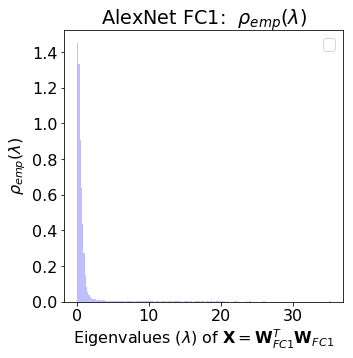

In [8]:
plt.hist(evals_FC1, bins=200,  alpha=0.25, color='blue', density=True);
plt.title(r"AlexNet FC1:  $\rho_{emp}(\lambda)$")
plt.ylabel(r"$\rho_{emp}(\lambda)$")
plt.xlabel(r"Eigenvalues ($\lambda$) of $\mathbf{X}=\mathbf{W}_{FC1}^{T}\mathbf{W}_{FC1}$")
plt.legend()
plt.savefig("img/alexnet-fc1-full.png")

RMT_Util.ipynb:7: RuntimeWarning: divide by zero encountered in true_divide
  "## RMT Util\n",
RMT_Util.ipynb:7: RuntimeWarning: invalid value encountered in sqrt
  "## RMT Util\n",


% spikes outside bulk 11.13
% sigma 0.6057


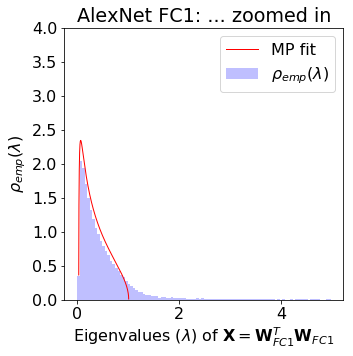

In [9]:
sigma = RMT_Util.plot_ESD_and_fit(model=None,eigenvalues=evals_FC1[evals_FC1<5], weightfile=None, layer=None, 
                            Q=Q, num_spikes = 400, sigma=None, color='blue')
plt.title(r"AlexNet FC1: ... zoomed in* ")
plt.ylabel(r"$\rho_{emp}(\lambda)$")
plt.xlabel(r"Eigenvalues ($\lambda$) of $\mathbf{X}=\mathbf{W}_{FC1}^{T}\mathbf{W}_{FC1}$")
plt.ylim(0,3)
plt.legend()
plt.savefig("img/alexnet-fc1.png")

## FC2

In [10]:
this_im = FC2_LAYER_ID

for im, m in enumerate(alexnet.modules()):
    print(im,m)
    if im == this_im:
        W_FC2 = np.array(m.weight.data.clone().cpu()) 
        Q = RMT_Util.get_Q(W_FC2)
        
        u, sv, sh = svd(W_FC2)
        evals_FC2 = sv*sv
        

0 AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p=0.5)
    (4): Linear(in_features=4096, out_featu

No handles with labels found to put in legend.


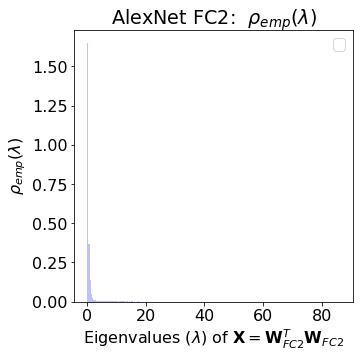

In [11]:
plt.hist(evals_FC2, bins=200,  alpha=0.25, color='blue', density=True);
plt.title(r"AlexNet FC2:  $\rho_{emp}(\lambda)$")
plt.ylabel(r"$\rho_{emp}(\lambda)$")
plt.xlabel(r"Eigenvalues ($\lambda$) of $\mathbf{X}=\mathbf{W}_{FC2}^{T}\mathbf{W}_{FC2}$")
plt.legend()
plt.savefig("img/alexnet-fc2-full.png")

RMT_Util.ipynb:7: RuntimeWarning: divide by zero encountered in true_divide
  "## RMT Util\n",
RMT_Util.ipynb:7: RuntimeWarning: invalid value encountered in multiply
  "## RMT Util\n",


% spikes outside bulk 12.61
% sigma 0.4625


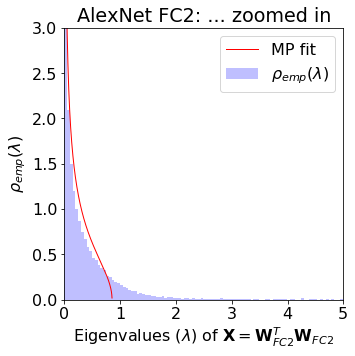

In [12]:
sigma = RMT_Util.plot_ESD_and_fit(model=None,eigenvalues=evals_FC2[evals_FC2<5], weightfile=None, layer=None, 
                            Q=Q, num_spikes = 450, sigma=None, color='blue')
plt.title(r"AlexNet FC2: ... zoomed in")
plt.xlim([0,5])
plt.ylim([0,3])
plt.ylabel(r"$\rho_{emp}(\lambda)$")
plt.xlabel(r"Eigenvalues ($\lambda$) of $\mathbf{X}=\mathbf{W}_{FC2}^{T}\mathbf{W}_{FC2}$")
plt.legend()
plt.savefig("img/alexnet-fc2.png")

## FC3

In [13]:
this_im = FC3_LAYER_ID

for im, m in enumerate(alexnet.modules()):
    if im == this_im:
        W_FC3 = np.array(m.weight.data.clone().cpu()) 
        Q = RMT_Util.get_Q(W_FC3)
        
        u, sv, sh = svd(W_FC3)
        evals_FC3 = sv*sv
        

No handles with labels found to put in legend.


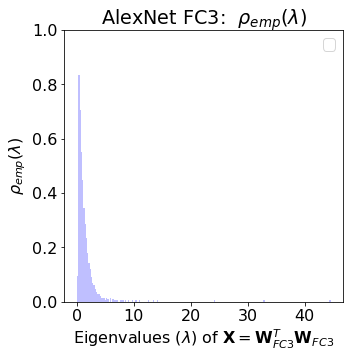

In [14]:
plt.hist(evals_FC3, bins=200,  alpha=0.25, color='blue', density=True);
plt.title(r"AlexNet FC3:  $\rho_{emp}(\lambda)$")
plt.ylabel(r"$\rho_{emp}(\lambda)$")
plt.xlabel(r"Eigenvalues ($\lambda$) of $\mathbf{X}=\mathbf{W}_{FC3}^{T}\mathbf{W}_{FC3}$")
plt.ylim(0,1)
plt.legend()
plt.savefig("img/alexnet-fc3-full.png")

RMT_Util.ipynb:7: RuntimeWarning: divide by zero encountered in true_divide
  "## RMT Util\n",
RMT_Util.ipynb:7: RuntimeWarning: invalid value encountered in sqrt
  "## RMT Util\n",


% spikes outside bulk 18.25
% sigma 0.9517


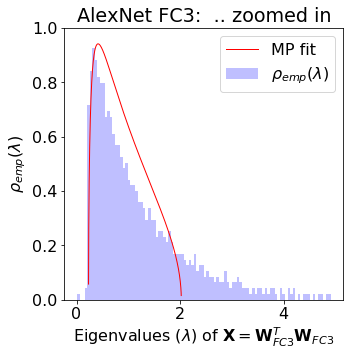

In [15]:
num_spikes = 150
sigma = RMT_Util.plot_ESD_and_fit(model=None,eigenvalues=evals_FC3[evals_FC3<5], weightfile=None, layer=None, 
                            Q=Q, num_spikes = num_spikes, sigma=None, color='blue')
plt.title(r"AlexNet FC3:  .. zoomed in")
plt.ylabel(r"$\rho_{emp}(\lambda)$")
plt.xlabel(r"Eigenvalues ($\lambda$) of $\mathbf{X}=\mathbf{W}_{FC3}^{T}\mathbf{W}_{FC3}$")
plt.ylim(0,1)
plt.legend()
plt.savefig("img/alexnet-fc3.png")

## Log-Log Histogram Plots of the ESDs for AlexNet

No handles with labels found to put in legend.


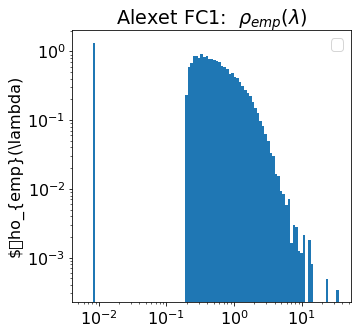

In [44]:
bins = np.logspace(np.log10(np.min(evals_FC1)), np.log10(np.max(evals_FC1)), num=100)
plt.hist(evals_FC3, bins=bins, density=True, log=True);
plt.xscale('log')
plt.title(r"Alexet FC1:  $\rho_{emp}(\lambda)$")
plt.ylabel("$\rho_{emp}(\lambda)")

plt.legend()
plt.savefig("img/alexnet-log-log-fc1.png")

No handles with labels found to put in legend.


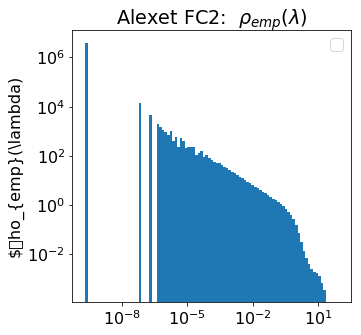

In [45]:
bins = np.logspace(np.log10(np.min(evals_FC2)), np.log10(np.max(evals_FC2)), num=100)
plt.hist(evals_FC2, bins=bins, density=True, log=True);
plt.xscale('log')
plt.title(r"Alexet FC2:  $\rho_{emp}(\lambda)$")
plt.ylabel("$\rho_{emp}(\lambda)")

plt.legend()
plt.savefig("img/alexnet-log-log-fc2.png")

No handles with labels found to put in legend.


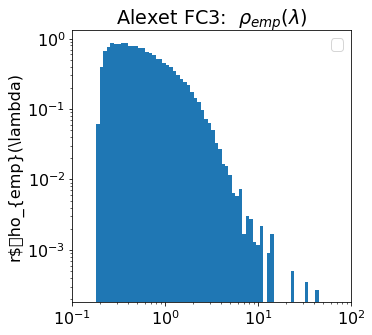

In [56]:
bins = np.logspace(np.log10(np.min(evals_FC3)), np.log10(np.max(evals_FC3)), num=100)
plt.hist(evals_FC3, bins=bins, density=True, log=True);
plt.xscale('log')
plt.title(r"Alexet FC3:  $\rho_{emp}(\lambda)$")
plt.ylabel("r$\rho_{emp}(\lambda)")
plt.legend()
plt.xlim(0.1, 100)
plt.savefig("img/alexnet-log-log-fc3.png")

## PowerLaw Analysis of FC1, FC2, FC3,  Section 5.5 and Figure 11 

### FC1 Power Law Fit

In [47]:
alpha, D, best = RMT_Util.fit_powerlaw(evals_FC1, verbose=True)
print("alpha for FC1 {:3g}   D {:3g} best fit is {}".format(alpha, D, best))

Calculating best minimal value for power law fit
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Assuming nested distributions


alpha for FC1 2.28822   D 0.0527164 best fit is PL


### FC3 Power Law Fit

In [48]:
alpha, D, best = RMT_Util.fit_powerlaw(evals_FC3, verbose=True)

Calculating best minimal value for power law fit
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Assuming nested distributions
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:1602: RuntimeWarning: invalid value encountered in true_divide
  CDF = CDF/norm
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
/Users/cha

In [49]:
print("alpha for FC3 {:3g}   D {:3g} best fit is {}".format(alpha, D, best))

alpha for FC3 3.01986   D 0.01856 best fit is PL


In [50]:
# guess mu as (3.5)/2 + 1

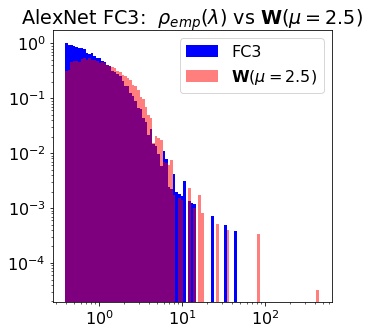

In [57]:
mu=2.5

W = np.random.pareto(mu,size=W_FC3.shape)
W = W/np.sqrt(np.max(W.shape))

Q = np.max(W.shape)/np.min(W.shape)
pvals, _ = RMT_Util.eigenspectrum(W)
bins = np.logspace(np.log10(np.min(pvals)), np.log10(np.max(pvals)), num=100)
plt.hist(evals_FC3, bins=bins, density=True, log=True, color='blue', label="FC3");

plt.hist(pvals, bins=bins, density=True, log=True, color='red', alpha=0.5, label=r"$\mathbf{W}(\mu=2.5)$");
plt.xscale('log')
plt.title(r"AlexNet FC3:  $\rho_{emp}(\lambda)$ vs $\mathbf{W}(\mu=2.5)$")
#plt.ylabel("$\rho_{emp}(\lambda)")
plt.legend()
plt.savefig("img/alexnet-log-log-fc3-overlay.png")

## Repeat for FC2, smaller power law (Heavier tail)

In [52]:
alpha, D, best = RMT_Util.fit_powerlaw(evals_FC2, verbose=True)
print("alpha for FC2 {:3g}   D {:3g} best fit is {}".format(alpha, D, best))

Calculating best minimal value for power law fit
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Assuming nested distributions


alpha for FC2 2.24516   D 0.037172 best fit is PL


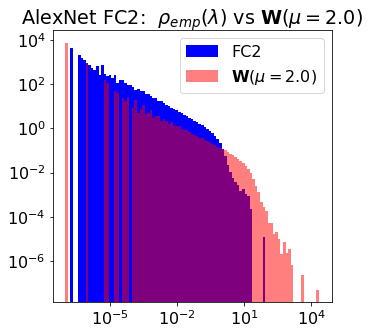

In [58]:
mu=2.0

W = np.random.pareto(mu,size=W_FC2.shape)
W = W/np.sqrt(np.max(W.shape))

Q = np.max(W.shape)/np.min(W.shape)
pvals, _ = RMT_Util.eigenspectrum(W)
bins = np.logspace(np.log10(np.min(pvals)), np.log10(np.max(pvals)), num=100)
plt.hist(evals_FC2, bins=bins, density=True, log=True, color='blue', label="FC2");

plt.hist(pvals, bins=bins, density=True, log=True, color='red', alpha=0.5, label=r"$\mathbf{W}(\mu=2.0)$");
plt.xscale('log')
plt.title(r"AlexNet FC2:  $\rho_{emp}(\lambda)$ vs $\mathbf{W}(\mu=2.0)$")
#plt.ylabel(r"$\rho_{emp}(\lambda)")
plt.legend()
plt.savefig("img/alexnet-log-log-fc2-overlay.png")

In [54]:
!pwd

/Users/charlesmartin14/work/soft-convexity
